In [41]:
import pandas as pd

In [42]:
df = pd.read_csv("/Users/sergi/Desktop/MBDA/Master/Data Science Foundations/Session_2/2_titanic_dataset.csv")

In [43]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### How many passengers doesn't have any Cabin or it is unknown?

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df ["Cabin"].isnull

0       True
1      False
2       True
3      False
4       True
5       True
6      False
7       True
8       True
9       True
10     False
11     False
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21     False
22      True
23     False
24      True
25      True
26      True
27     False
28      True
29      True
       ...  
861     True
862    False
863     True
864     True
865     True
866     True
867    False
868     True
869     True
870     True
871    False
872    False
873     True
874     True
875     True
876     True
877     True
878     True
879    False
880     True
881     True
882     True
883     True
884     True
885     True
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool

AttributeError: 'function' object has no attribute 'sum'

### Which is the mean age of all passengers?

In [17]:
df ["Age"].mean ()

29.69911764705882

In [20]:
import matplotlib.pyplot as plt

In [21]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11116bc18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113a7b668>]], dtype=object)

In [22]:
df["Age"].hist ()

<bound method hist_series of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

### How is distributed the age of all passengers?

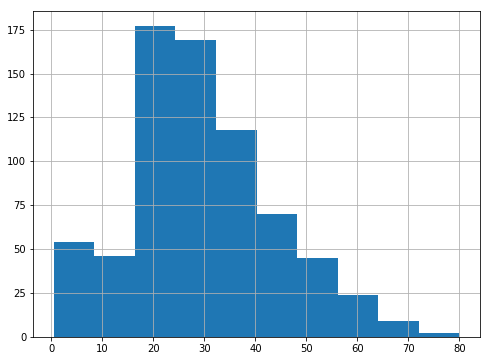

In [29]:
plt.figure(figsize=[8,6])
df["Age"].hist()
plt.show()

### How is distributed the ticket class of all passengers per age?

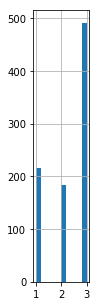

In [38]:
plt.figure(figsize=[1,5])
df["Pclass"].hist()
plt.show()

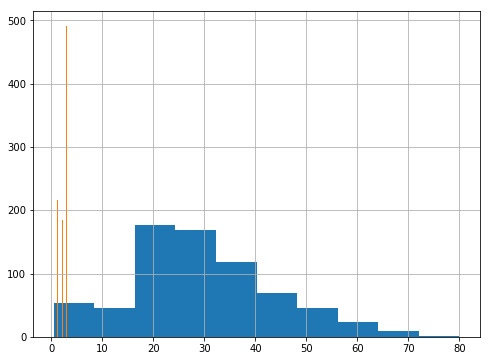

In [42]:
plt.figure(figsize=[8,6])
y= df["Age"].hist()
x= df["Pclass"].hist()
plt.show()

### Which is the minimum fare that was paid to embark on the Titanic?

In [44]:
df["Fare"].min()

0.0

### Which is the maximum fare that was paid to embark on the Titanic?

In [45]:
df ["Fare"].max()

512.32920000000001

In [47]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

### How many males and females where inside Titanic?

In [52]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [53]:
df["Sex"].value_counts()
plt.figure(figsize=[8,6])
plt.show()

In [54]:
plt.figure(figsize=[8,6])
df["Sex"].value_counts()
plt.show()

### Advanced Processing Of Data

In [14]:
import re
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name) # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
    
# Create a new feature Title
df['Title'] = df['Name'].apply(get_title)

In [15]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [16]:
df['Title'] = df['Title'].replace(['Lady','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [17]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare', 'Mme', 'Ms', 'Mlle'], dtype=object)

In [18]:
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [19]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

#### Mapping aproach

In [20]:
df.loc[df['Age'] <= 16, 'NumericAge'] = 0

In [21]:
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'NumericAge'] = 1

In [22]:
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'NumericAge'] = 2

In [23]:
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'NumericAge'] = 3

In [24]:
df.loc[df['Age'] > 64, 'NumericAge'] = 4

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

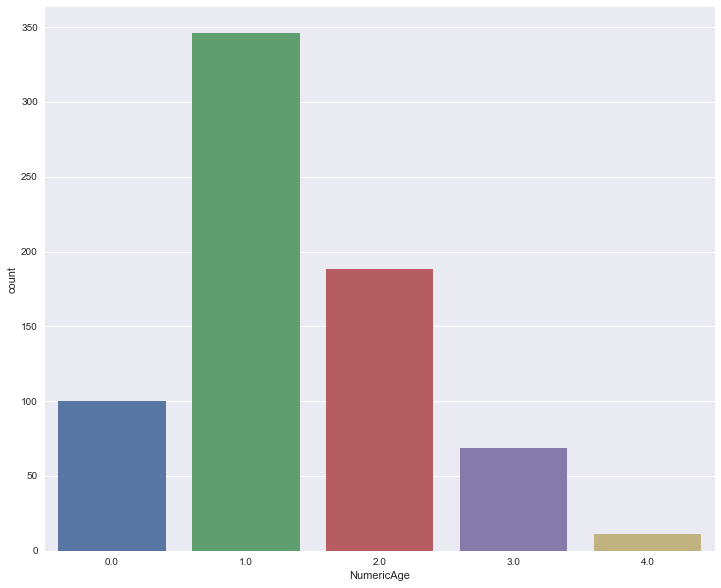

In [26]:
plt.figure(figsize=[12,10])
sns.countplot(df['NumericAge'])
plt.show()

In [27]:
df['CategoricalAge'] = pd.cut(df['Age'], 5)

In [28]:
df['CategoricalAge']

0      (16.336, 32.252]
1      (32.252, 48.168]
2      (16.336, 32.252]
3      (32.252, 48.168]
4      (32.252, 48.168]
5                   NaN
6      (48.168, 64.084]
7        (0.34, 16.336]
8      (16.336, 32.252]
9        (0.34, 16.336]
10       (0.34, 16.336]
11     (48.168, 64.084]
12     (16.336, 32.252]
13     (32.252, 48.168]
14       (0.34, 16.336]
15     (48.168, 64.084]
16       (0.34, 16.336]
17                  NaN
18     (16.336, 32.252]
19                  NaN
20     (32.252, 48.168]
21     (32.252, 48.168]
22       (0.34, 16.336]
23     (16.336, 32.252]
24       (0.34, 16.336]
25     (32.252, 48.168]
26                  NaN
27     (16.336, 32.252]
28                  NaN
29                  NaN
             ...       
861    (16.336, 32.252]
862    (32.252, 48.168]
863                 NaN
864    (16.336, 32.252]
865    (32.252, 48.168]
866    (16.336, 32.252]
867    (16.336, 32.252]
868                 NaN
869      (0.34, 16.336]
870    (16.336, 32.252]
871    (32.252, 

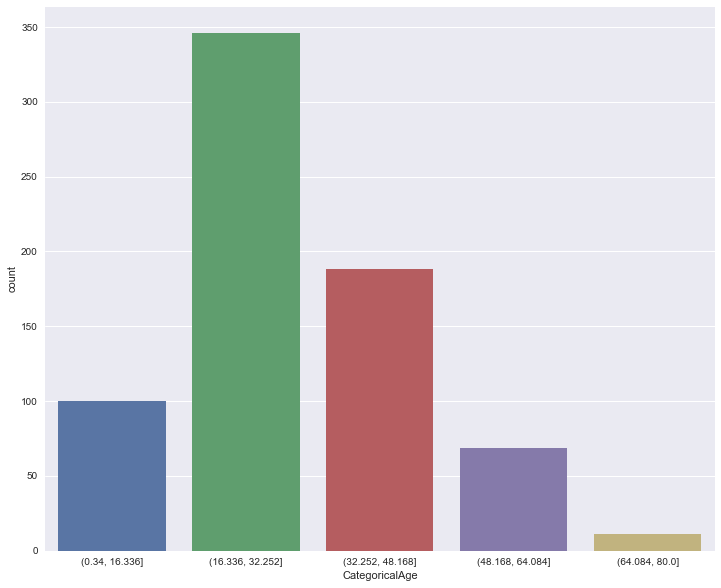

In [29]:
plt.figure(figsize=[12,10])
sns.countplot(df['CategoricalAge'])
plt.show()

In [30]:
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex

In [31]:
df['Person'] = df[['Age','Sex']].apply(get_person,axis=1)

In [32]:
df['Person']

0        male
1      female
2      female
3      female
4        male
5        male
6        male
7       child
8      female
9       child
10      child
11     female
12       male
13       male
14      child
15     female
16      child
17       male
18     female
19     female
20       male
21       male
22      child
23       male
24      child
25     female
26       male
27       male
28     female
29       male
        ...  
861      male
862    female
863    female
864      male
865    female
866    female
867      male
868      male
869     child
870      male
871    female
872      male
873      male
874    female
875     child
876      male
877      male
878      male
879    female
880    female
881      male
882    female
883      male
884      male
885    female
886      male
887    female
888    female
889      male
890      male
Name: Person, Length: 891, dtype: object

In [33]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   NaN      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                                Rice, Master. Eugene    male   2.0      4   
17                        Williams, Mr. Charles Eugene    male   NaN      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                             Masselmani, Mrs. Fatima  female   NaN

In [34]:
df['Sex'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0)

In [35]:
df['Title']

0      1
1      3
2      2
3      3
4      1
5      1
6      1
7      4
8      3
9      3
10     2
11     2
12     1
13     1
14     2
15     3
16     4
17     1
18     3
19     3
20     1
21     1
22     2
23     1
24     2
25     3
26     1
27     1
28     2
29     1
      ..
861    1
862    3
863    2
864    1
865    3
866    2
867    1
868    1
869    4
870    1
871    3
872    1
873    1
874    3
875    2
876    1
877    1
878    1
879    3
880    3
881    1
882    2
883    1
884    1
885    3
886    5
887    2
888    2
889    1
890    1
Name: Title, Length: 891, dtype: int64

In [36]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
5                                     Moran, Mr. James    1   NaN      0   
6                              McCarthy, Mr. Timothy J    1  54.0      0   
7                       Palsson, Master. Gosta Leonard    1   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)    0  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut    0   4.0      1   
11                            Bonnell, Miss. Elizabeth    0  58.0      0   
12                      Saundercock, Mr. William Henry    1  20.0      0   
13                         Andersson, Mr. Anders Johan    1  39.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina    0  14.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)     0  55.0      0   
16                                Rice, Master. Eugene    1   2.0      4   
17                        Williams, Mr. Charles Eugene    1   NaN      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...    0  31.0      1   
19                             Masselmani, Mrs. Fatima    0   NaN      0   
20                                Fynney, Mr. Joseph

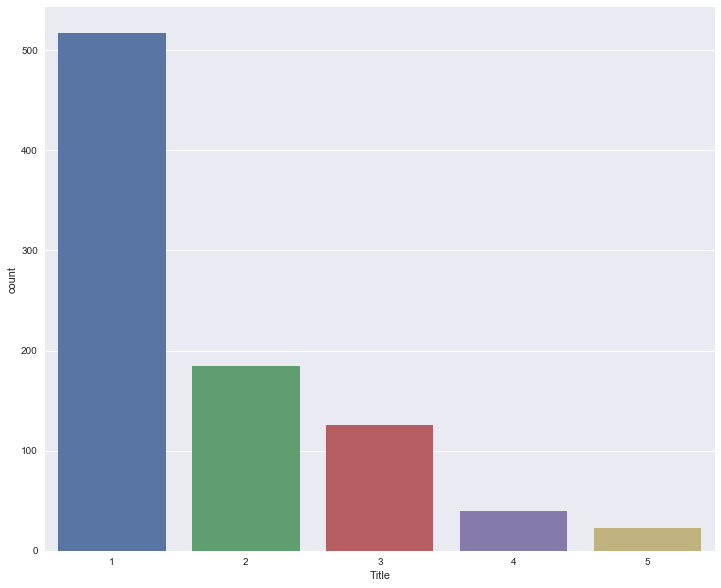

In [37]:
plt.figure(figsize=[12,10])
sns.countplot(df['Title'])
plt.show()

In [38]:
df[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()

Person  Survived
0   child  0.590361
1  female  0.756458
2    male  0.163873

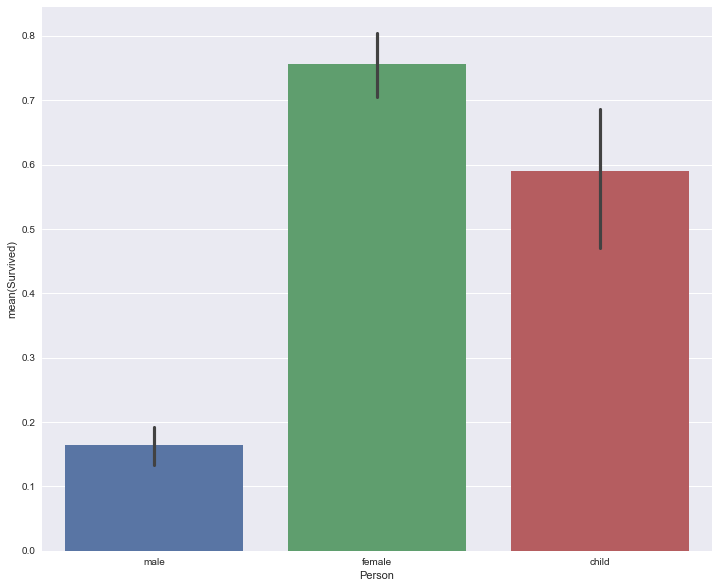

In [39]:
plt.figure(figsize=[12,10])
sns.barplot('Person','Survived', data=df)

#show the plot
plt.show ()

In [44]:
df.groupby(['Pclass'],as_index=False).agg({'Age':'mean', 'Survived':'sum'})[['Age','Survived']].reset_index()

index        Age  Survived
0      0  38.233441       136
1      1  29.877630        87
2      2  25.140620       119